In [2]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import matplotlib.pyplot as plt

# 1. Eigenvalues of the coefficient matrix

Let's set up a matrix
$$
A =
\left[
\begin{array}{r r r r r}
2 & -1 &  & & \\
-1 & 2 & -1 & & \\
   & -1 & 2 & -1 & \\
& & \ddots & & \\
& & & -1 & 2
\end{array}
\right]
$$

In [3]:
n = 64
A = sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')

Then look at the eigenvalues and eigenvectors of $A$.

Here we will sort the values before proceeding.

In [4]:
# eigenvalues and eigenvectors
evals, evecs = np.linalg.eig(A.toarray())

# sort eigenvalues
eid = np.argsort(evals)
evals = evals[eid]
evecs = evecs[:,eid]

Since we are solving the interior problem on an $n$ point mesh, we'll use $n+2$ points for the grid and take the $n$ interior points for plotting.

The boundary conditions are $u(0)=u(1)=0$. Alternatively we can plot zero at the ends.

Text(0.5, 0, 'x')

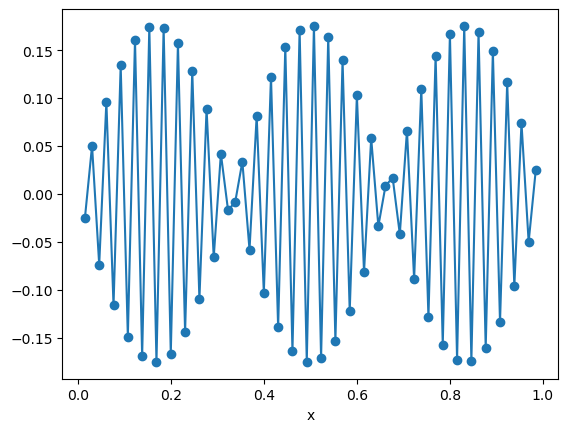

In [5]:
x = np.linspace(0,1,n+2)[1:-1]
plt.plot(x,evecs[:,61], 'o-')
plt.xlabel('x')

Now plot a few modes, $k$.

Notice the eigenvalues correspond to the Fourier modes.

For $n$ points, on a grid from 0 to $n+1$, we have
$$
\lambda_k = 4 \sin^{2} \left(\frac{k \pi}{2(n+1)}\right)
$$
where $k=1,\dots,n$, and the $j^{th}$ point of the eigenvector given by ($j=1,\dots,n$)
$$
(v_k)_j = \sin\left(\frac{(j)*k\pi}{n+1}\right)
$$

eig k=0: eval_k=0.0023355463353464615
eig k=2: eval_k=0.020987201097896882
eig k=5: eval_k=0.08350834178166744


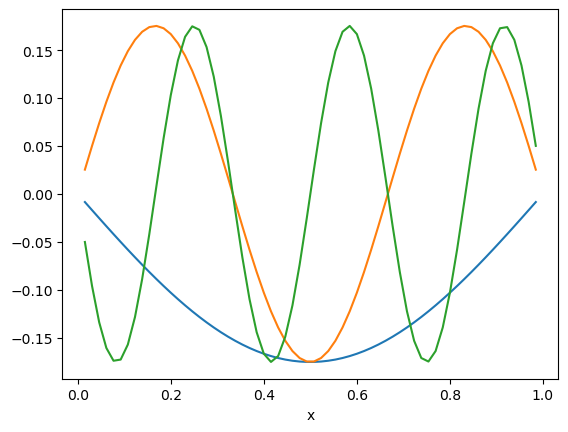

In [6]:
for k in [0,2,5]:
    print(f'eig k={k}: eval_k={evals[k]}')
    plt.plot(x,evecs[:,k])
    plt.xlabel('x')

Now, let's plot the eigevalues, and shift / scale them so they land within $[-1,1]$:

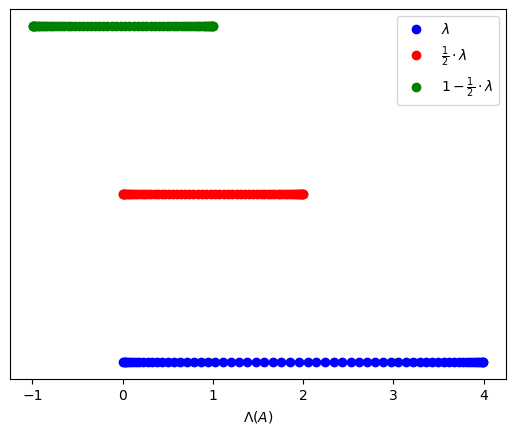

In [7]:
plt.plot(evals, 0*evals, 'bo', label=r'$\lambda$')
plt.plot(0.5*evals, 1+0*evals, 'ro', label=r'$\frac{1}{2}\cdot\lambda$')
plt.plot(1-0.5*evals, 2+0*evals, 'go', label=r'$1-\frac{1}{2}\cdot\lambda$')

plt.yticks([])
plt.xlabel(r'$\Lambda(A)$')
plt.legend()

# 2 Smoothing property of relaxation methods

Lets consider a 64x64 one dimensional problem

In [8]:
n = 64
A = sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')
b = np.zeros((n,))
x = np.linspace(0,1,n+2)[1:-1]
I = sparse.eye(n, format='csr')
Dinv = 0.5 * I
D = 2 * I
E = -sparse.tril(A, -1)

We will take a random *error* in this case and
run the problem
$$
A u = 0
$$

In [18]:
rnorm = []

test = 'random'

if test == 'random':
    np.random.seed(233008)
    u = np.random.rand(n)
elif test == 'smooth':
    n = A.shape[0]
    u = np.sin(np.pi * np.arange(1, n+1)/ (n+1))

uinit = u.copy()

for i in range(100):
    u[:] = u - 2/3 * Dinv * A * u
    #u[:] = u - sla.(D-E, A*u)
    rnorm.append(np.linalg.norm(A * u))

$$
u \leftarrow u + \omega D^{-1}r
$$
if $b=0$, then $r = - A u$

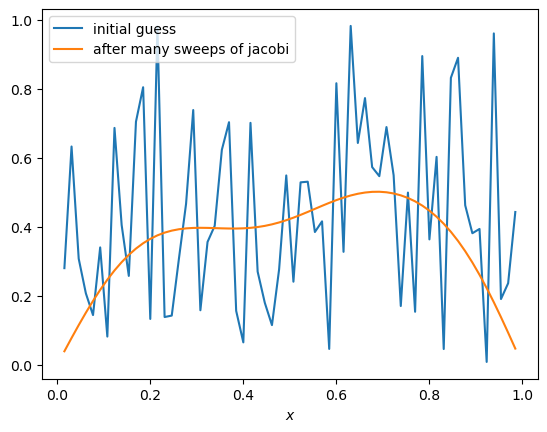

In [19]:
plt.plot(x, uinit, '-', label='initial guess')
plt.plot(x, u, '-', label='after many sweeps of jacobi')
plt.xlabel(r'$x$')
plt.legend()

In this example we will consider 4 specific modes: 1, 3, 6, and 48

In [20]:
u1 = np.sin(np.arange(1,n+1) * 1 * np.pi / (n+1))
u3 = np.sin(np.arange(1,n+1) * 3 * np.pi / (n+1))
u6 = np.sin(np.arange(1,n+1) * 6 * np.pi / (n+1))
u48 = np.sin(np.arange(1,n+1) * 48 * np.pi / (n+1))


omega = 2.0 / 3.0

rnorm1 = []
rnorm3 = []
rnorm6 = []
rnorm48 = []

for i in range(100):
    u = u1
    u[:] = u - omega * Dinv * A * u
    rnorm1.append(np.linalg.norm(A * u))

    u = u3
    u[:] = u - omega * Dinv * A * u
    rnorm3.append(np.linalg.norm(A * u))

    u = u6
    u[:] = u - omega * Dinv * A * u
    rnorm6.append(np.linalg.norm(A * u))

    u = u48
    u[:] = u - omega * Dinv * A * u
    rnorm48.append(np.linalg.norm(A * u))

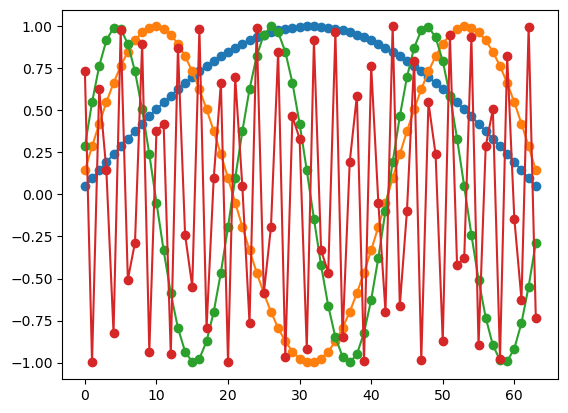

In [21]:
u1 = np.sin(np.arange(1,n+1) * 1 * np.pi / (n+1))
u3 = np.sin(np.arange(1,n+1) * 3 * np.pi / (n+1))
u6 = np.sin(np.arange(1,n+1) * 6 * np.pi / (n+1))
u48 = np.sin(np.arange(1,n+1) * 48 * np.pi / (n+1))
plt.plot(u1, '-o', label='k=1')
plt.plot(u3,  '-o', label='k=2')
plt.plot(u6, '-o', label='k=3')
plt.plot(u48, '-o', label='k=48')

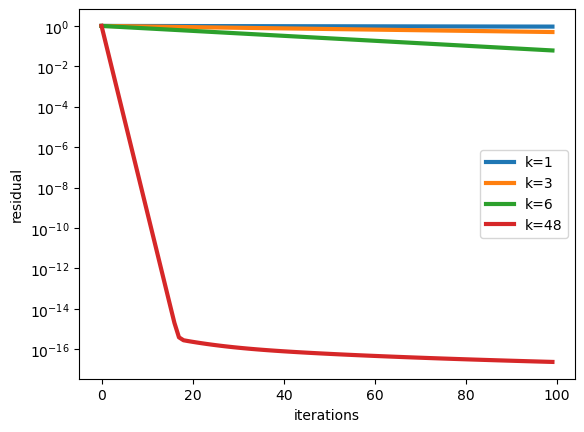

In [22]:
for rnorm, label in zip([rnorm1, rnorm3, rnorm6, rnorm48],
                        ['k=1', 'k=3', 'k=6', 'k=48']):
    rnorm = np.array(rnorm) / rnorm[0]
    plt.semilogy(rnorm, lw=3, label=label)
plt.xlabel('iterations')
plt.ylabel('residual')
plt.legend()

We can also consider an initial error made up of three modes (in this case 1, 6, and 32.  What happens to the error?

In [23]:
omega = 2.0 / 3.0

rnorm = []
enorm = []
u1 = np.sin(1 * np.pi * np.arange(1, n+1)/ (n+1))
u6 = np.sin(6 * np.pi * np.arange(1, n+1)/ (n+1))
u32 = np.sin(32 * np.pi * np.arange(1, n+1)/ (n+1))
u = ((u1 + u6 + u32) / 3.0).copy()
rnorm.append(np.linalg.norm(A * u))
enorm.append(np.linalg.norm(u, ord=np.inf))

for i in range(100):
    u[:] = u - omega * Dinv * A * u
    rnorm.append(np.linalg.norm(A * u))
    enorm.append(np.linalg.norm(u, ord=np.inf))  # why?

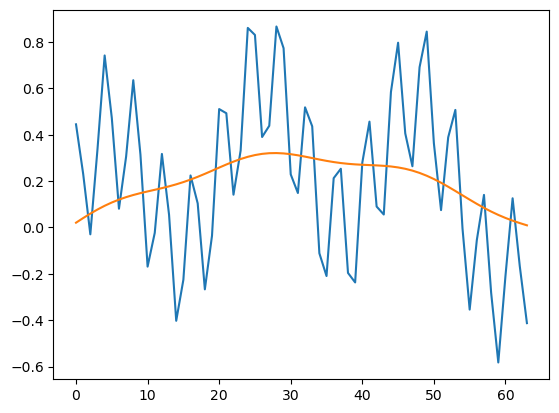

In [24]:
plt.plot((u1 + u6 + u32) / 3.0)
plt.plot(u)

(0.0, 100.0, 0.0, 1.0)

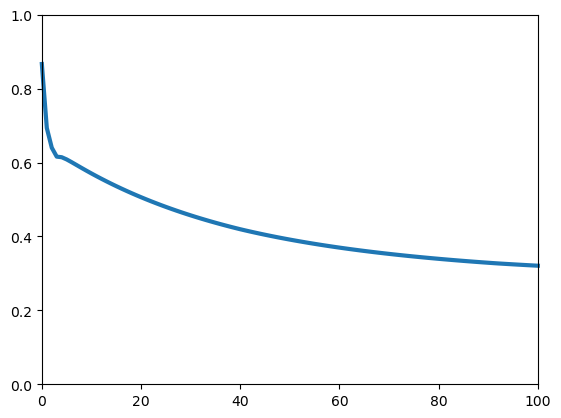

In [25]:
norm = enorm
#norm = np.array(norm) / norm[0]
plt.plot(norm, lw=3, clip_on=False)
plt.axis([0,100, 0, 1])

Let's observe the spectrum of
$$
G = I - \omega D^{-1} A
$$
for several $\omega$

[]

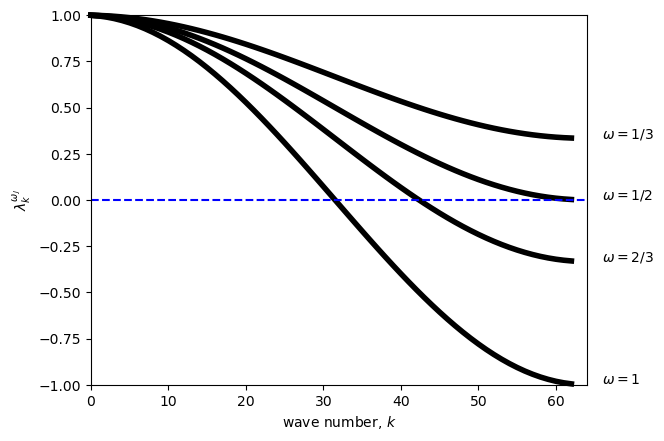

In [28]:
K = np.arange(1,n)

omega = 1.0 /2
lmbda = 1 - (omega / 2) * 4.0 * np.sin(np.pi * K / (2*(n+1)))**2
plt.plot(lmbda,'-k',label='residual',linewidth=4, clip_on=False)
plt.text(n+2, lmbda[-1], r'$\omega=1/2$')

omega = 1.0 / 3.0
lmbda = 1 - (omega / 2) * 4.0 * np.sin(np.pi * K / (2*(n+1)))**2
plt.plot(lmbda,'-k',label='residual',linewidth=4, clip_on=False)
plt.text(n+2, lmbda[-1], r'$\omega=1/3$')

omega = 2.0 / 3.0
lmbda = 1 - (omega / 2) * 4.0 * np.sin(np.pi * K / (2*(n+1)))**2
plt.plot(lmbda,'-k',label='residual',linewidth=4, clip_on=False)
plt.text(n+2, lmbda[-1], r'$\omega=2/3$')

omega = 1
lmbda = 1 - (omega / 2) * 4.0 * np.sin(np.pi * K/ (2*(n+1)))**2
plt.plot(lmbda,'-k',label='residual',linewidth=4, clip_on=False)
plt.text(n+2, lmbda[-1], r'$\omega=1$')

plt.plot([0, n], [0, 0], '--b')
plt.axis([0,n,-1,1])
plt.ylabel(r'$\lambda^{\omega_J}_k$')
plt.xlabel(r'wave number, $k$')

plt.plot()

# 3. Error vector

Let's create a matrix
$$
A =
\left[
\begin{array}{r r r r r}
2 & -1 &  & & \\
-1 & 2 & -1 & & \\
   & -1 & 2 & -1 & \\
& & \ddots & & \\
& & & -1 & 2
\end{array}
\right]
$$

and the necessary operators for weighted Jacobi

In [29]:
n = 64
A = sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')

I = sparse.eye(n, format='csr')
Dinv = 0.5 * I
D = 2 * I
E = -sparse.tril(A, -1)

Next, instead of solving
$$
A u = 0
$$
we will solve
$$
A u = b
$$
with $u^*$ selected at random and $b$ constructed from the product.

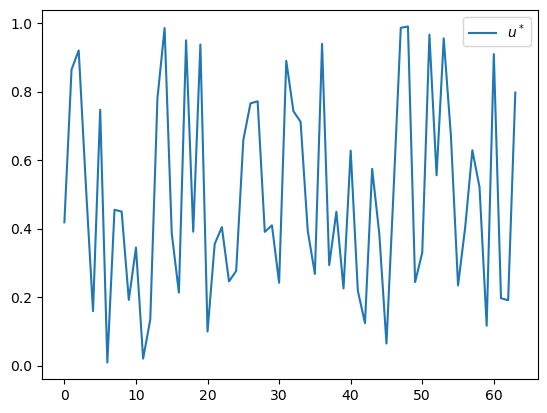

In [30]:
np.random.seed(65883)
ustar = np.random.rand(n)
b = A * ustar

plt.plot(ustar, label=r'$u^*$')
plt.legend()

next, let's relax on
$$
Au = b
$$
and look at the **solution**

In [31]:
omega = 2.0/3.0
rnorm = []
monitor = True
u = np.random.rand(n)
for i in range(10):
    u[:] = u + omega * Dinv * (b - A * u)
    #u[:] = u - sla.spsolve(D-E, A*u)
    rnorm.append(np.linalg.norm(b - A * u))

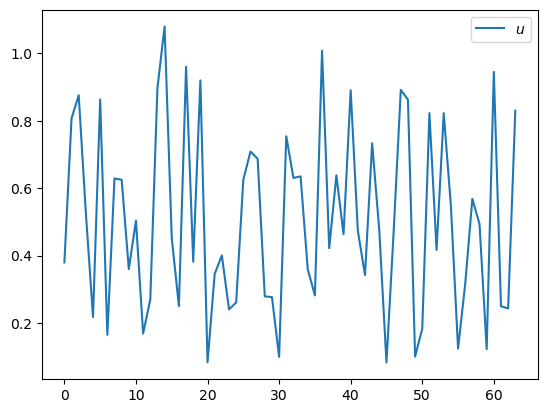

In [32]:
plt.plot(u, label=r'$u$')
plt.legend()

Now look at the **ERROR**

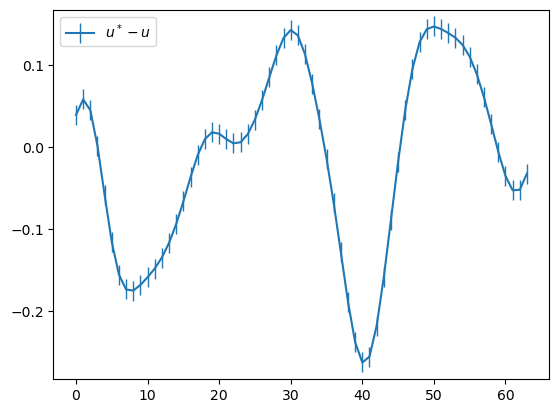

In [33]:
plt.plot(ustar - u, marker='|', markersize=15, label=r'$u^* - u$')
plt.legend()

To look ahead, take a look at the **error** on every other point...

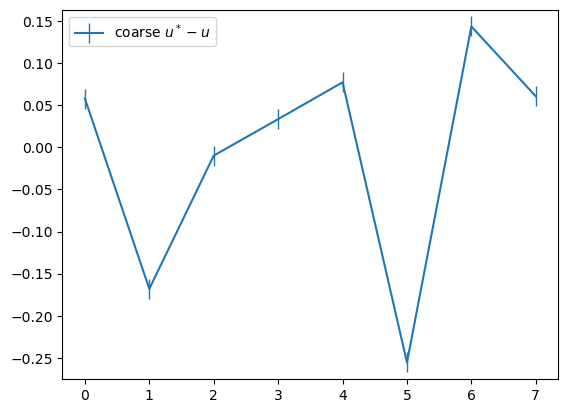

In [34]:
e = ustar - u
plt.plot(e[1::8], marker='|', markersize=15, label=r'coarse $u^* - u$')
plt.legend()

# 4. Coarse grid

Let's consider two sine modes, one sampled on a fine space
$$
\sin(k \pi x_f)
$$
and one sampled on a coarse space
$$
\sin(k \pi x_c)
$$

In [35]:
m = 4
k = 4

nf = 2**m - 1
xf = np.linspace(0,1,nf)
yf = np.sin(k * np.pi * xf)

nc = 2**(m-1) - 1
xc = xf[1:-1:2]
yc = np.sin(k * np.pi * xc)

First plot the coarse points

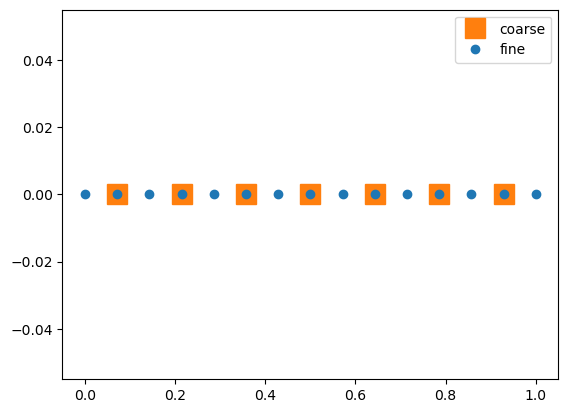

In [36]:
plt.plot(xc, 0*xc, 's', color='tab:orange', ms=15, label='coarse')
plt.plot(xf, 0*xf, 'o', color='tab:blue', label='fine')
plt.legend()

Then look at a low mode:

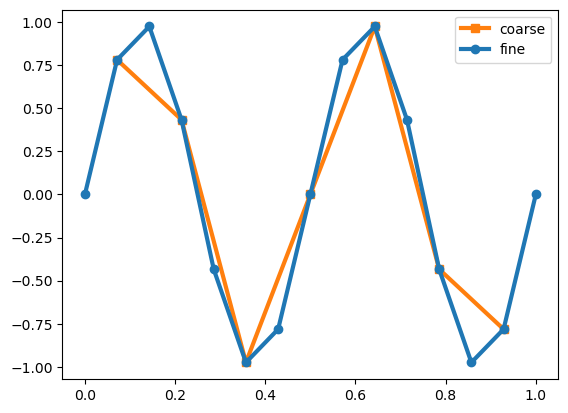

In [37]:
plt.plot(xc, yc, '-s', color='tab:orange', lw=3, clip_on=False, label='coarse')
plt.plot(xf, yf, '-o', color='tab:blue', lw=3, clip_on=False, label='fine')
plt.legend()

Then plot a high mode:

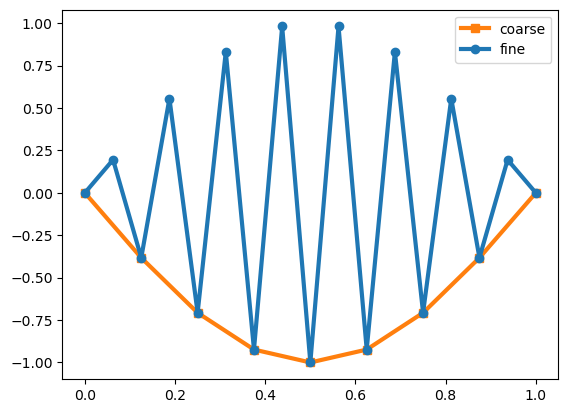

In [38]:
m = 4
k = 15

nf = 2**m + 1
xf = np.linspace(0,1,nf)
yf = np.sin(k * np.pi * xf)

nc = 2**(m-1) + 1
xc = np.linspace(0,1,nc)
yc = np.sin(k * np.pi * xc)

plt.plot(xc, yc, '-s', color='tab:orange', lw=3, clip_on=False, label='coarse')
plt.plot(xf, yf, '-o', color='tab:blue', lw=3, clip_on=False, label='fine')
plt.legend()

# 5 Interpolation

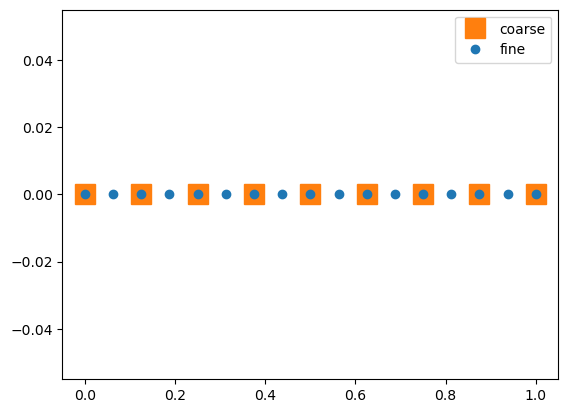

In [39]:
plt.plot(xc, 0*xc, 's', color='tab:orange', ms=15, label='coarse')
plt.plot(xf, 0*xf, 'o', color='tab:blue', label='fine')
plt.legend()

In [40]:
def interpolate(vc):
    """
    linear interpolation

    vc : array of size 2**k - 1

    interpolate v of size 2**(m-1)-1 to 2**(m)-1
    """
    nc = len(vc)
    nf = 2**(int(np.log2(nc+1))+1)-1

    vf = np.zeros((nf,))

    # 1
    vf[2:-1:2] = 0.5 * vc[:-1] + 0.5 * vc[1:]

    # 2
    vf[1::2] = vc

    # 3
    vf[0] = 0.5 * vc[0]
    # 4
    vf[-1] = 0.5 * vc[-1]

    return vf

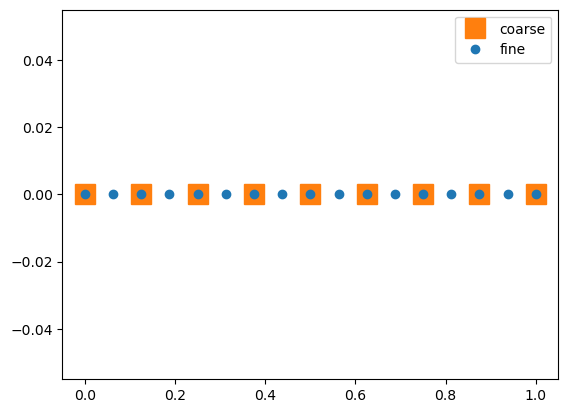

In [41]:
plt.plot(xc, 0*xc, 's', color='tab:orange', ms=15, label='coarse')
plt.plot(xf, 0*xf, 'o', color='tab:blue', label='fine')
plt.legend()

In [42]:
def interpolate_inj(vc):
    """
    linear interpolation

    vc : array of size 2**k - 1

    interpolate v of size 2**(m-1)-1 to 2**(m)-1
    """
    nc = len(vc)
    nf = 2**(int(np.log2(nc+1))+1)-1

    vf = np.zeros((nf,))

    # 2
    vf[1::2] = vc

    return vf

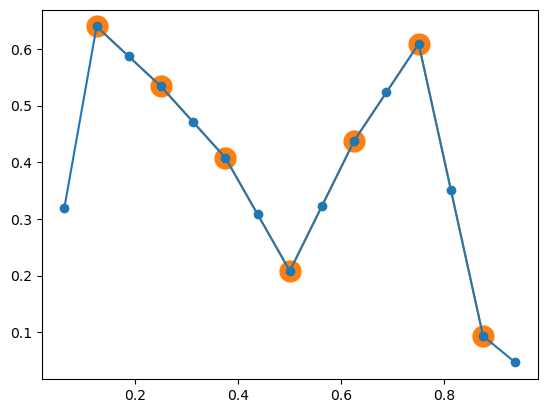

In [43]:
m = 4
nf = 2**m - 1
nc = 2**(m-1) - 1

xc = np.linspace(0,1,nc+2)[1:-1]
vc = np.sin(3 * np.pi * xc)
vc = np.random.rand(nc)
plt.plot(xc, vc, 'o-', color='tab:orange', clip_on=False, ms=15)

xf = np.linspace(0,1,nf+2)[1:-1]
vf = interpolate(vc)
#vf[0::2] += 0.5 * np.random.randn(len(vf[::2]))

plt.plot(xf, vf, 'o-', clip_on=False)

In [44]:
P = np.zeros((15,7))
for i in range(7):
    z = np.zeros(7)
    z[i] = 1
    P[:,i] = interpolate(z)
print(P)

[[0.5 0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.5]]


In [45]:
P2 = np.zeros((15,7))
for i in range(7):
    z = np.zeros(7)
    z[i] = 1
    P2[:,i] = interpolate_inj(z)
print(P2)

[[0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [46]:
n = 15
A = sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr').toarray()
print(A)

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]


In [47]:
P.T @ A @ P

array([[ 1. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-0.5,  1. , -0.5,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  1. , -0.5,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -0.5,  1. , -0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5,  1. , -0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -0.5,  1. , -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.5,  1. ]])

In [48]:
P.T @ P

array([[1.5 , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 1.5 , 0.25, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.25, 1.5 , 0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 1.5 , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.25, 1.5 , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.25, 1.5 , 0.25],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 1.5 ]])

In [49]:
I = np.eye(15)

In [50]:
np.linalg.norm(I - P @ P.T)

3.24037034920393

# 6. Two-grid Algorithm

### norm

First create a *grid* norm, something that calculates the L2 norm on our domain.

In [51]:
def hnorm(r):
    """define ||r||_h = h ||r||_2"""
    n = len(r)
    h = 1.0 / (n+1)
    hrnorm = h * np.linalg.norm(r)
    return hrnorm

### poisson

construct a poisson operator

In [52]:
def poissonop(n):
    A = (n+1)**2 * sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')
    return A

print(poissonop(5).toarray() / 36)

[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]


### relaxation

Try weighted Jacobi with $\omega = 2/3$

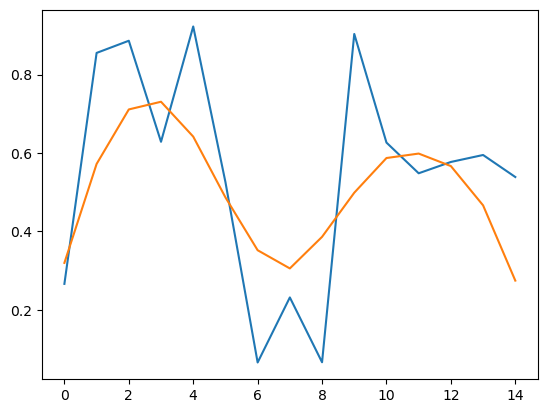

In [53]:
def relax(A, u, f, nu):
    n = A.shape[0]
    Dinv = 1.0 / (2.0 * (n+1)**2)
    omega = 2.0 / 3.0
    for steps in range(nu):
        u += omega * Dinv * (f - A * u)

A = poissonop(15)
u = np.random.rand(15)
f = np.zeros(15)
uinit = u.copy()
relax(A, u, f, 3)
plt.plot(uinit)
plt.plot(u)

### interpolation / restriction

Interpolation and restriction can be done in place

In [54]:
def interpolate(uc):
    """interpolate u of size 2**(k-1)-1 to 2**(k)-1"""
    nc = len(uc)
    nf = 2**(int(np.log2(nc+1))+1)-1
    uf = np.zeros((nf,))
    I = np.arange(1,nf,2)
    uf[I-1] = 0.5 * uc
    uf[I] = uc
    uf[I+1] += 0.5 * uc
    return uf

def restrict(uf):
    """restrict u of size 2**(k)-1 to 2**(k-1)-1"""
    nf = len(uf)
    nc = 2**(int(np.log2(nf+1))-1)-1
    uc = np.zeros((nc,))
    I = np.arange(1,nf,2)
    uc = 0.25 * uf[I-1] + 0.5 * uf[I] + 0.25 * uf[I+1]
    return uc

(0.0, 1.0, 0.0, 1.0)

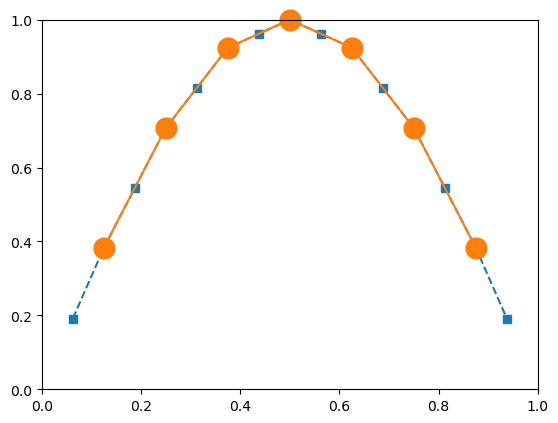

In [55]:
k=4
nc = 2**(k-1)-1
nf = 2**(k)-1
xc = np.linspace(0,1,nc+2)[1:-1]
xf = np.linspace(0,1,nf+2)[1:-1]

uc = np.sin(xc*np.pi)
uf = interpolate(uc)

plt.plot(xf, uf, '--s')
plt.plot(xc, uc, '-o', clip_on=False, ms=15)
plt.axis([0,1,0,1])

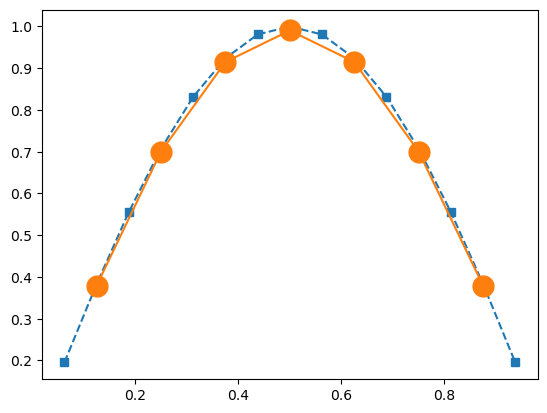

In [56]:
uf = np.sin(xf*np.pi)
uc = restrict(uf)

plt.plot(xf, uf, '--s')
plt.plot(xc, uc, '-o', ms=15)

## Set up a problem

Let's use a random solution.

In [57]:
import scipy.sparse.linalg as sla
k = 20
n = 2**k - 1
print("size = %d" % n)
u = np.random.rand(n)
xx = np.linspace(0,1,n+2)[1:-1]

#f = np.random.rand(n)#np.pi**2 * np.sin(np.pi*xx)
A = poissonop(n)
f = A * np.random.rand(n)
ustar = sla.spsolve(A, f)

size = 1048575


### Try one cycle...

starting residual:  1071949672.702969
starting error:  0.0003982717955021486
  ending residual:  76966275.23537455
  ending error:  5.855286547863905e-05


Text(0, 0.5, '$e(x)$')

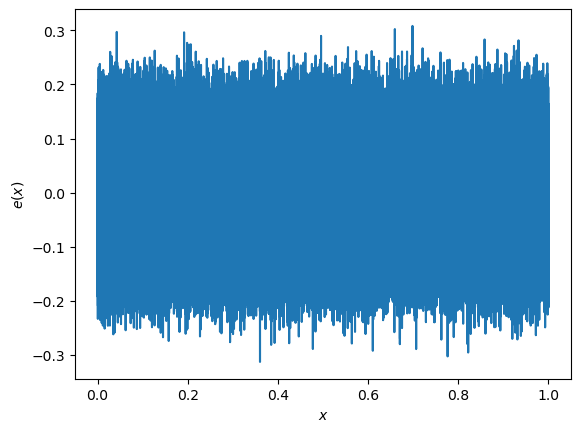

In [58]:
print('starting residual: ', hnorm(f - A * u))
print('starting error: ', hnorm(u - ustar))
relax(A, u, f, 1)
rc = restrict(f - A * u)
Ac = poissonop(len(rc))
ec = sparse.linalg.spsolve(Ac, rc)
ef = interpolate(ec)
u = u + ef
relax(A, u, f, 1)
print('  ending residual: ', hnorm(f - A * u))
print('  ending error: ', hnorm(u - ustar))
plt.plot(xx, u-ustar)
plt.xlabel(r'$x$')
plt.ylabel(r'$e(x)$')

### Now try many cycles...

In [59]:
u = np.random.rand(n)

res = [hnorm(f - A * u)]

print("res[0] = %g"%res[-1])
for cycle in range(20):
    relax(A, u, f, 2)
    rc = restrict(f - A * u)
    ec = sparse.linalg.spsolve(poissonop(len(rc)), rc)
    ef = interpolate(ec)
    u = u + ef
    relax(A, u, f, 2)
    res.append(hnorm(f - A * u))
    print("res[%d] = %g"%(cycle+1,res[-1]))


res[0] = 1.07317e+09
res[1] = 1.17873e+07
res[2] = 482991
res[3] = 25054.7
res[4] = 1394.97
res[5] = 79.9938
res[6] = 4.6627
res[7] = 0.274633
res[8] = 0.0162936
res[9] = 0.000971852
res[10] = 5.82045e-05
res[11] = 3.49852e-06
res[12] = 2.32158e-07
res[13] = 8.45956e-08
res[14] = 7.92836e-08
res[15] = 7.86524e-08
res[16] = 7.861e-08
res[17] = 7.86125e-08
res[18] = 7.86321e-08
res[19] = 7.85681e-08
res[20] = 7.85335e-08


# 7 Multigrid V-cycle

### Define:

- `hnorm`: a grid dependent L2 norm
- `poissonopmatrix` and `poissonop`, a matrix and matrix free version of the Poisson operator
- `residual`, `relax`, `interpolate`, `restrict`, matrix free multigrid components

In [60]:
def hnorm(r):
    """define ||r||_h = h ||r||_2"""
    n = len(r)
    h = 1.0 / (n+1)
    hrnorm = h * np.linalg.norm(r)
    return hrnorm

def poissonopmatrix(n):
    A = (n+1)**2 * sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')
    return A

def poissonop(u):
    """
    Poisson operator h^{-2} * [-1 2 1]
    Action of A * u
    """
    n = len(u)
    v = np.zeros(len(u))
    v[1:-1] = ((n+1)**2) * (2 * u[1:-1] - u[2:] - u[:-2])
    v[0]    = ((n+1)**2) * (2 * u[0]    - u[1])
    v[-1]   = ((n+1)**2) * (2 * u[-1]   - u[-2])
    return v

def residual(u, f):
    """
    f - A u
    """
    n = len(f)
    r = np.zeros(len(u))
    r[1:-1] = f[1:-1] - ((n+1)**2) * (2 * u[1:-1] - u[2:] - u[:-2])
    r[0]    = f[0]    - ((n+1)**2) * (2 * u[0]    - u[1])
    r[-1]   = f[-1]   - ((n+1)**2) * (2 * u[-1]   - u[-2])
    return r

def relax(u, f, nu):
    """
    Weighted Jacobi
    """
    n = len(u)
    Dinv = 1.0 / (2.0 * ((n+1)**2))
    omega = 2.0 / 3.0
    unew = u.copy()

    for steps in range(nu):
        unew = unew + omega * Dinv * residual(unew, f)

    return unew

def interpolate(uc):
    """interpolate u of size 2**(k-1)-1 to 2**(k)-1"""
    uf = np.zeros((2*len(uc) + 1,))
    uf[:-1:2] = 0.5 * uc
    uf[1::2] = uc
    uf[2::2] += 0.5 * uc
    return uf

def restrict(uf):
    """restrict u of size 2**(k)-1 to 2**(k-1)-1"""
    uc = 0.25 * uf[:-1:2] + 0.5 * uf[1::2] + 0.25 * uf[2::2]
    return uc

### Two-grid, hand-coded

In [61]:
def vcycle2(u0, f0, nu):
    u0 = relax(u0, f0, nu)
    f1 = restrict(residual(u0, f0))
    u1 = sla.spsolve(poissonopmatrix(len(f1)), f1)
    ui = interpolate(u1)
    u0 = u0 + ui
    u0 = relax(u0, f0, nu)
    return u0

### Three-grid, hand-coded

In [62]:
def vcycle3(u, f, nu):
    f0 = f.copy()
    u0 = u.copy()

    u0 = relax(u0, f0, nu)
    f1 = restrict(residual(u0, f0))

    u1 = relax(np.zeros(len(f1)), f1, nu)
    f2 = restrict(residual(u1, f1))

    A2 = poissonopmatrix(len(f2))
    u2 = sla.spsolve(A2, f2)

    u1 += interpolate(u2)
    u1 = relax(u1, f1, 1)

    u0 += interpolate(u1)
    u0 = relax(u0, f0, 1)
    return u0

### V-cycle (non-recursive)

In [63]:
def vcycle(kmax, kmin, u, f, nu):
    """
    kmax : size of the fine grid 2**kmax -1
    kmin : size of the coarse grid 2**kmin - 1
    """
    ulist = [None for k in range(kmax+1)]
    flist = [None for k in range(kmax+1)]

    # down cycle
    for k in range(kmax, kmin, -1):
        u = relax(u, f, nu)
        ulist[k] = u
        flist[k] = f

        f = restrict(residual(u, f))
        u = np.zeros(f.shape)
        ulist[k-1] = u
        flist[k-1] = f

    # coarsest grid
    Ac = poissonopmatrix(2**kmin - 1)
    flist[kmin] = f
    ulist[kmin] = sla.spsolve(Ac, f)

    # up cycle
    for k in range(kmin+1, kmax+1, 1):
        u = ulist[k]
        f = flist[k]
        uc = ulist[k-1]
        u += interpolate(uc)
        u = relax(u, f, nu)
    return u

## Set up a problem

Here we will set up a problem on $\Omega = [0,1]$.
$$
f = 2 - 12 x^2\\
u^* = x^4 - x^2
$$
where $u^*$ will solve the problem
$$
-u'' = f
$$
In addition, from the matrix problem $A u = f$, we define
$$
u^*_d = A^{-1} f
$$

In [64]:
kmax = 8
kmin = 2

# set up fine problem
n = 2**kmax - 1

xx = np.linspace(0, 1, n+2)[1:-1]

f = 2 - 12 * xx**2

ustar = xx**4 - xx**2
A = poissonopmatrix(len(f))
udstar = sla.spsolve(A, f)
print("discretization error: ", hnorm(ustar - udstar))

discretization error:  1.7411631146516944e-07


## Things to measure

We'll measure four things in this test:
1. The residual
$$
r_k = f - A u_k
$$
2. The discretization error
$$
e = u^* - u_d^*
$$
3. The total error
$$
e = u^* - u_k
$$
4. The algebraic error
$$
e = u^*_d - u_k
$$

In [65]:
u = np.random.rand(len(f))

# set up smoothing sweeps
nu = 1

res = []
err = []
aerr = []

res.append(hnorm(residual(u, f)))
for i in range(30):
    u = vcycle(kmax, kmin, u, f, nu)
    res.append(hnorm(residual(u, f)))
    err.append(hnorm(u - ustar))
    aerr.append(hnorm(udstar - u))
    print("res = %10.4e, total err = %10.4e  alg err = %10.4e" % (res[-1], err[-1], aerr[-1]))

res = 2.0657e+02, total err = 5.3036e-03  alg err = 5.3036e-03
res = 2.7174e+01, total err = 1.5432e-03  alg err = 1.5432e-03
res = 5.4083e+00, total err = 4.7131e-04  alg err = 4.7133e-04
res = 1.4128e+00, total err = 1.4385e-04  alg err = 1.4386e-04
res = 4.0529e-01, total err = 4.3972e-05  alg err = 4.3980e-05
res = 1.2022e-01, total err = 1.3494e-05  alg err = 1.3502e-05
res = 3.6431e-02, total err = 4.1676e-06  alg err = 4.1731e-06
res = 1.1238e-02, total err = 1.3024e-06  alg err = 1.3004e-06
res = 3.5193e-03, total err = 4.3504e-07  alg err = 4.0878e-07
res = 1.1157e-03, total err = 2.1089e-07  alg err = 1.2962e-07
res = 3.5679e-04, total err = 1.7658e-07  alg err = 4.1442e-08
res = 1.1468e-04, total err = 1.7384e-07  alg err = 1.3353e-08
res = 3.6961e-05, total err = 1.7392e-07  alg err = 4.3330e-09
res = 1.1930e-05, total err = 1.7404e-07  alg err = 1.4150e-09
res = 3.8569e-06, total err = 1.7409e-07  alg err = 4.6467e-10
res = 1.2496e-06, total err = 1.7411e-07  alg err = 1.5

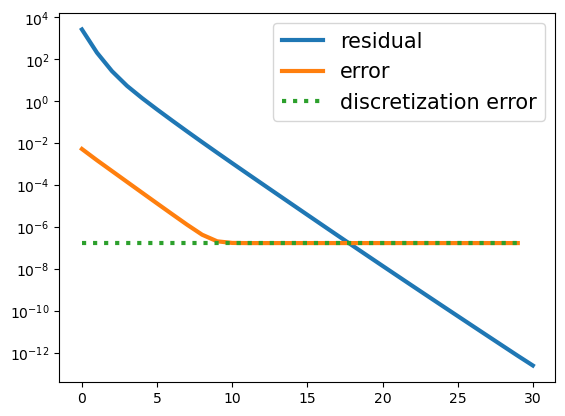

In [66]:
plt.semilogy(res, lw=3, label='residual')
plt.semilogy(err, lw=3, label='error')
de = hnorm(ustar - udstar)
plt.semilogy([de for i in range(len(err))],':', lw=3, label='discretization error')
plt.legend(fontsize=15)